In [1]:
from os import listdir
from os.path import isfile, join
# from Utils import Load, Write
import pandas as pd
import numpy as np
from scipy import stats
# import math
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import cm
# import plotly.plotly as py
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
from collections import Counter
import myplots
from myplots import calc_sig_corr
import os
from queue.qp import qp,fakeqp
from addloglevels import sethandlers
import logging 
from Utils import cacheOnDisk


### concating the sample-aa sequences dfs:

In [28]:
# load pickles, seperate to prod and non prod dfs and concatenate

filenames = [f for f in listdir('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df') if isfile(join('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df', f))]
#filenames = [datafile for datafile in filenames if datafile.startswith ('HIP') and datafile.endswith('.csv')]
#df_names=[re.sub('.csv', '', datafile) for datafile in filenames]
print len(filenames)

#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\unique_aa_seq_df_all_samples\gen_aa_seq_df

30


In [29]:
prod_aa_seq_all_df_list=[]
non_prod_aa_seq_all_df_list=[]

n=1
for file_name in filenames:
    print n
    print file_name
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df/%s' %file_name, 'rb') as f:
        prod_aa_seq_total_df,non_prod_aa_seq_total_df=pickle.load(f)
    f.close()
    prod_aa_seq_all_df_list.append(prod_aa_seq_total_df)
    non_prod_aa_seq_all_df_list.append(non_prod_aa_seq_total_df)
    n=n+1
print len(prod_aa_seq_all_df_list)
print len(non_prod_aa_seq_all_df_list)
prod_aa_seq_all_df=pd.concat(prod_aa_seq_all_df_list)
non_prod_aa_seq_all_df=pd.concat(non_prod_aa_seq_all_df_list)
print "finished concating..."

1
gen_aa_seq_df_460_480
2
gen_aa_seq_df_380_400
3
gen_aa_seq_df_100_120
4
gen_aa_seq_df_560_580
5
gen_aa_seq_df_200_220
6
gen_aa_seq_df_300_320
7
gen_aa_seq_df_260_280
8
gen_aa_seq_df_40_60
9
gen_aa_seq_df_360_380
10
gen_aa_seq_df_160_180
11
gen_aa_seq_df_400_420
12
gen_aa_seq_df_500_520
13
gen_aa_seq_df_220_240
14
gen_aa_seq_df_80_100
15
gen_aa_seq_df_60_80
16
gen_aa_seq_df_280_300
17
gen_aa_seq_df_320_340
18
gen_aa_seq_df_120_140
19
gen_aa_seq_df_540_560
20
gen_aa_seq_df_440_460
21
gen_aa_seq_df_580_600
22
gen_aa_seq_df_20_40
23
gen_aa_seq_df_0_20
24
gen_aa_seq_df_420_440
25
gen_aa_seq_df_180_200
26
gen_aa_seq_df_520_540
27
gen_aa_seq_df_140_160
28
gen_aa_seq_df_480_500
29
gen_aa_seq_df_340_360
30
gen_aa_seq_df_240_260
30
30
finished concating...


In [37]:
non_prod_aa_seq_all_df.to_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_df.h5','group',format='fixed')
#prod_aa_seq_all_df

In [ ]:
df.to_hdf('test_compression_fixed.h5','df',mode='w',format='fixed',complib='blosc',complevel=9)

In [53]:
#f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_df.h5'
prod_aa_seq_all_df.to_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_df.h5','df',mode='w',format='table',complib='blosc',complevel=9)
#prod_aa_seq_all_df

In [36]:
non_prod_aa_seq_all_df.drop('index',axis=1,inplace=1)
non_prod_aa_seq_all_df.set_index('Sample', inplace=1)
non_prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CASSQDL*ASAETQYF
HIP14156,CASRS*LAGEGDTQYF
HIP14156,CSAEPRLAGGL*LYEQYF
HIP14156,CSATH*LAETYNEQFF
HIP14156,CASSLR*VRGPGANTEAFF


In [38]:
prod_aa_seq_all_df.drop('index',axis=1,inplace=1)
prod_aa_seq_all_df.set_index('Sample', inplace=1)
prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CATSDTLAGQPQHF
HIP14156,CASSLHQPTQPQHF
HIP14156,CASSQQGMGAGELFF
HIP14156,CASSLVLAGGHNEQFF
HIP14156,CASSLGASGGAEFF


### generating CDR3 tables:

In [ ]:
CDR3identity=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/CDR3 identity table EXTENDED2-140417.txt") 

In [ ]:
columns_to_keep=['CDR3', 'Species', 'Epitope', 'Epitope gene', 'Epitope species', 'Reference','Score','# OCCURENCES']

In [ ]:
print len(CDR3identity_small)

In [ ]:
CDR3identity_small_noDup=CDR3identity_small.drop_duplicates(subset=['CDR3', 'Species', 'Epitope', 'Epitope gene', 'Epitope species'],
                                                            keep='first')

In [ ]:
print len(CDR3identity_small_noDup)

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/CDR3identity_small_EXTENDED_noDup', 'wb') as f:
    pickle.dump(CDR3identity_small_noDup,f)
f.close()

In [ ]:
CDR3pathology=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/McPAS-TCR.txt") 
print len(CDR3pathology)

In [ ]:
columns_to_keep2=['CDR3.beta.aa', 'Species', 'Category', 'Pathology',
       'Antigen.protein', 'Epitope.peptide', 'Tissue', 'T.Cell.Type','PubMed.ID']

In [ ]:
columns_to_keep2=['CDR3.beta.aa', 'Species', 'Category', 'Pathology',
       'Antigen.protein', 'Epitope.peptide', 'Tissue', 'T.Cell.Type','PubMed.ID']

In [ ]:
CDR3pathology_small=CDR3pathology[columns_to_keep2]
print len(CDR3pathology_small)

In [ ]:
CDR3pathology_small_noDup=CDR3pathology_small.drop_duplicates(subset=['CDR3.beta.aa', 'Species', 'Category', 'Pathology',
       'Antigen.protein', 'Epitope.peptide', 'Tissue', 'T.Cell.Type'])
print len(CDR3pathology_small_noDup)

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/CDR3pathology_small_noDup', 'wb') as f:
    pickle.dump(CDR3pathology_small_noDup,f)
f.close()

In [ ]:
CDR3pathology_small_noDup['origin table']='McPAS'
CDR3identity_small_noDup['origin table']='vdjdb'

In [ ]:
UnitedCDR3table=pd.merge(CDR3identity_small_noDup,CDR3pathology_small_noDup,how='outer',left_on='CDR3', right_on='CDR3.beta.aa')
print len(UnitedCDR3table)

In [ ]:
column_rename_dic={'Species_x': 'Species-vdjdb' , 'Epitope':'Epitope-vdjdb', 'Epitope gene':'Epitope gene-vdjdb', 
                   'Epitope species':'Epitope species-vdjdb', 'Reference':'Reference-vdjdb', 'Score':'Score-vdjdb',
                   'Species_y':'Species-McPAS', 'Category':'Category-McPAS', 'Pathology': 'Pathology-McPAS',
                   'Antigen.protein':'Epitope gene-McPAS', 'Epitope.peptide':'Epitope-McPAS', 'Tissue':'Tisse-McPAS',
                   'T.Cell.Type':'T.Cell.Type-McPAS','PubMed.ID': 'Reference-McPAS'}

In [ ]:
UnitedCDR3table=UnitedCDR3table.rename(columns=column_rename_dic)
UnitedCDR3table.head()

In [ ]:
new_cols=['CDR3',
 
 'Category-McPAS',
 'Pathology-McPAS',
 'Epitope species-vdjdb',
 'Epitope gene-vdjdb',
 'Epitope gene-McPAS',
 'Species-vdjdb',
 'Species-McPAS',
 'Epitope-vdjdb',
 'Epitope-McPAS',
 'Score-vdjdb',
 'Tisse-McPAS',
 'T.Cell.Type-McPAS',
 'Reference-vdjdb',
 'Reference-McPAS']

In [ ]:
UnitedCDR3tableFixed=UnitedCDR3table[new_cols]

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/UnitedCDR3tableFixed', 'wb') as f:
    pickle.dump(UnitedCDR3tableFixed,f)
f.close()

### New calculation of sharing percentage and number of samples per sequence (all 587 samples):

In [3]:
prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_df.h5','df')

In [39]:
non_prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_df.h5','group')

In [6]:
prod_aa_seq_all_df.head()

,Sample,aa sequence
0,HIP14156,CATSDTLAGQPQHF
1,HIP14156,CASSLHQPTQPQHF
2,HIP14156,CASSQQGMGAGELFF
3,HIP14156,CASSLVLAGGHNEQFF
4,HIP14156,CASSLGASGGAEFF


In [40]:
non_prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CASSQDL*ASAETQYF
HIP14156,CASRS*LAGEGDTQYF
HIP14156,CSAEPRLAGGL*LYEQYF
HIP14156,CSATH*LAETYNEQFF
HIP14156,CASSLR*VRGPGANTEAFF


In [13]:
prod_aa_seq_all_df_toMerge=pd.DataFrame(prod_aa_seq_all_df['aa sequence'].value_counts())


In [41]:
non_prod_aa_seq_all_df_toMerge=pd.DataFrame(non_prod_aa_seq_all_df['aa sequence'].value_counts())


In [17]:
prod_aa_seq_all_groupedByNsamples=prod_aa_seq_all_df_toMerge
prod_aa_seq_all_groupedByNsamples.rename(columns={'aa sequence':'n samples'},inplace=1)
prod_aa_seq_all_groupedBySequence=prod_aa_seq_all_groupedByNsamples

In [42]:
non_prod_aa_seq_all_groupedByNsamples=non_prod_aa_seq_all_df_toMerge
non_prod_aa_seq_all_groupedByNsamples.rename(columns={'aa sequence':'n samples'},inplace=1)
non_prod_aa_seq_all_groupedBySequence=non_prod_aa_seq_all_groupedByNsamples

In [18]:
prod_aa_seq_all_groupedBySequence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60333735 entries, CASSLGETQYF to CASSSSQTSGGGNEQFF
Data columns (total 1 columns):
n samples    int64
dtypes: int64(1)
memory usage: 920.6+ MB


In [43]:
non_prod_aa_seq_all_groupedBySequence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145335 entries, CASS*ETQYF to CASSE*GTSVSYNEQFF
Data columns (total 1 columns):
n samples    int64
dtypes: int64(1)
memory usage: 32.7+ MB


In [20]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_groupedBySequence.h5'
prod_aa_seq_all_groupedBySequence.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)


In [44]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_groupedBySequence.h5'
non_prod_aa_seq_all_groupedBySequence.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)


In [21]:
prod_aa_seq_all_groupedBySequence.head()

,n samples
CASSLGETQYF,587
CASSLQETQYF,586
CASSSQETQYF,586
CASSLGGNTEAFF,585
CASSLSTDTQYF,585


In [45]:
non_prod_aa_seq_all_groupedBySequence.head()

,n samples
CASS*ETQYF,173
CASSL*ETQYF,137
CASSF*ETQYF,92
CASSP*ETQYF,85
CASS*YEQYF,73


In [46]:
non_prod_aa_seq_all_groupedBySequence.reset_index(inplace=1)
non_prod_aa_seq_all_groupedBySequence.head()

,index,n samples
0,CASS*ETQYF,173
1,CASSL*ETQYF,137
2,CASSF*ETQYF,92
3,CASSP*ETQYF,85
4,CASS*YEQYF,73


In [25]:
prod_aa_seq_all_df_toMerge_grouped=prod_aa_seq_all_groupedBySequence.groupby('n samples').count().rename(columns={'index':'n seq'})
prod_aa_seq_all_df_toMerge_grouped.head()

,n seq
n samples,
1,50463288
2,4646116
3,1711373
4,887795
5,541911


In [47]:
non_prod_aa_seq_all_df_toMerge_grouped=non_prod_aa_seq_all_groupedBySequence.groupby('n samples').count().rename(columns={'index':'n seq'})
non_prod_aa_seq_all_df_toMerge_grouped.head()

,n seq
n samples,
1,2090530
2,37948
3,8567
4,3404
5,1682


In [48]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_groupedByNsamples.h5'
non_prod_aa_seq_all_df_toMerge_grouped.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)


In [27]:
total_n_seq_prod= prod_aa_seq_all_df_toMerge_grouped['n seq'].sum()
n_seq_private_prod=prod_aa_seq_all_df_toMerge_grouped.loc[1,'n seq']
perc_public_prod=round(100-((float(n_seq_private_prod)/total_n_seq_prod)*100),2)
prod_aa_seq_all_df_toMerge_grouped['weighted n seq']=prod_aa_seq_all_df_toMerge_grouped['n seq']*prod_aa_seq_all_df_toMerge_grouped.index
mean_n_samples_prod=round(float(prod_aa_seq_all_df_toMerge_grouped['weighted n seq'].sum())/prod_aa_seq_all_df_toMerge_grouped['n seq'].sum(),2)
max_n_samples_prod=prod_aa_seq_all_df_toMerge_grouped.index.max()

In [49]:
total_n_seq_non_prod= non_prod_aa_seq_all_df_toMerge_grouped['n seq'].sum()
n_seq_private_non_prod=non_prod_aa_seq_all_df_toMerge_grouped.loc[1,'n seq']
perc_public_non_prod=round(100-((float(n_seq_private_non_prod)/total_n_seq_non_prod)*100),2)
non_prod_aa_seq_all_df_toMerge_grouped['weighted n seq']=non_prod_aa_seq_all_df_toMerge_grouped['n seq']*non_prod_aa_seq_all_df_toMerge_grouped.index
mean_n_samples_non_prod=round(float(non_prod_aa_seq_all_df_toMerge_grouped['weighted n seq'].sum())/non_prod_aa_seq_all_df_toMerge_grouped['n seq'].sum(),2)
max_n_samples_non_prod=non_prod_aa_seq_all_df_toMerge_grouped.index.max()

In [28]:
print total_n_seq_prod
print n_seq_private_prod
print perc_public_prod
print mean_n_samples_prod
print max_n_samples_prod

60333735
50463288
16.36
1.85
587


In [50]:
print total_n_seq_non_prod
print n_seq_private_non_prod
print perc_public_non_prod
print mean_n_samples_non_prod
print max_n_samples_non_prod

2145335
2090530
2.55
1.05
173


In [35]:
def public10perc(df):
    dfMore10=df[df.index>58]
    sumMore10=dfMore10['n seq'].sum()
    sumTotal=df['n seq'].sum()
    perc_public10=(float(sumMore10)/sumTotal)*100
    return perc_public10

def public50perc(df):
    dfMore50=df[df.index>293]
    sumMore50=dfMore50['n seq'].sum()
    sumTotal=df['n seq'].sum()
    perc_public50=(float(sumMore50)/sumTotal)*100
    return perc_public50

def public95perc(df):
    dfMore95=df[df.index>557]
    sumMore95=dfMore95['n seq'].sum()
    sumTotal=df['n seq'].sum()
    perc_public95=(float(sumMore95)/sumTotal)*100
    return perc_public95


print public10perc(prod_aa_seq_all_df_toMerge_grouped)
print public50perc(prod_aa_seq_all_df_toMerge_grouped)
print public95perc(prod_aa_seq_all_df_toMerge_grouped)




0.185141861348
0.00961982545917
0.000208838388673


In [51]:
print public10perc(non_prod_aa_seq_all_df_toMerge_grouped)
print public50perc(non_prod_aa_seq_all_df_toMerge_grouped)
print public95perc(non_prod_aa_seq_all_df_toMerge_grouped)


0.000419514900936
0.0
0.0


In [54]:
non_prod_n_samples=list(non_prod_aa_seq_all_df_toMerge_grouped.index)
non_prod_public_counter=list(non_prod_aa_seq_all_df_toMerge_grouped['n seq'])

In [55]:
prod_n_samples=list(prod_aa_seq_all_df_toMerge_grouped.index)
prod_public_counter=list(prod_aa_seq_all_df_toMerge_grouped['n seq'])

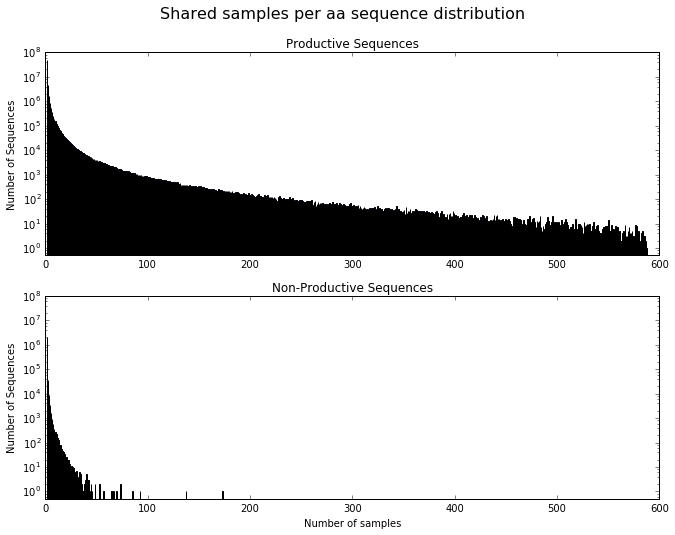

In [58]:
fig=plt.figure(figsize=(11,8))
plt.suptitle('Shared samples per aa sequence distribution', fontsize=16)
plt.subplot(2,1,1)
plt.bar(prod_n_samples,prod_public_counter, color='blue')
plt.yscale('log')
plt.ylim(0.5,10**8)
plt.xlim(0,600)
plt.title('Productive Sequences')
plt.ylabel('Number of Sequences')
plt.subplot(2,1,2)
plt.bar(non_prod_n_samples,non_prod_public_counter, color='red')
plt.yscale('log')
plt.ylim(0.5,10**8)
plt.xlim(0,600)
plt.title('Non-Productive Sequences')
plt.xlabel('Number of samples')
plt.ylabel('Number of Sequences')
filename='shared samples per aa seqeunce distribution - 587 samples'
fig.savefig(filename, bbox_inches='tight', dpi = 800)

plt.show()

### identification of public and private CDR3 sequences:

In [62]:
maxSharedDF=prod_aa_seq_all_groupedBySequence[prod_aa_seq_all_groupedBySequence['n samples']==max_n_samples_prod]
print len(maxSharedDF)

1


In [129]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/CDR3identity_small_EXTENDED_noDup', 'rb') as f:
    CDR3identity_small_EXTENDED_noDup=pickle.load(f)
f.close()

In [139]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/CDR3pathology_small_noDup', 'rb') as f:
    CDR3pathology_small_noDup=pickle.load(f)
f.close()

In [152]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/UnitedCDR3tableFixed', 'rb') as f:
    UnitedCDR3tableFixed=pickle.load(f)
f.close()

In [117]:
maxSharedDF

,index,n samples
0,CASSLGETQYF,587


In [123]:
shared95percDF=prod_aa_seq_all_groupedBySequence[prod_aa_seq_all_groupedBySequence['n samples']>557]
print len(shared95percDF)

126


In [124]:
sharedDF=prod_aa_seq_all_groupedBySequence[prod_aa_seq_all_groupedBySequence['n samples']>1]
print len(sharedDF)

9870447


In [137]:
privateSeqDF=prod_aa_seq_all_groupedBySequence[prod_aa_seq_all_groupedBySequence['n samples']==1]
print len(privateSeqDF)

50463288


In [91]:
shared95percDF.head()

,index,n samples
0,CASSLGETQYF,587
1,CASSLQETQYF,586
2,CASSSQETQYF,586
3,CASSLGGNTEAFF,585
4,CASSLSTDTQYF,585


In [132]:
shared95percIdentity=pd.merge(shared95percDF,CDR3identity_small_EXTENDED_noDup, how='inner'  ,left_on='index', right_on='CDR3')
print len(shared95percIdentity)

In [141]:
shared95percPathology=pd.merge(shared95percDF,CDR3pathology_small_noDup, how='inner'  ,left_on='index', right_on='CDR3.beta.aa')
print len(shared95percPathology)

In [155]:
shared95percUnitedIdentity=pd.merge(shared95percDF,UnitedCDR3tableFixed, how='inner'  ,left_on='index', right_on='CDR3')
print len(shared95percUnitedIdentity)

7


In [156]:
shared95percUnitedIdentity

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
0,CASSLTGNTEAFF,584,CASSLTGNTEAFF,NaN,NaN,CMV,p65,NaN,HomoSapiens,NaN,NLVPMVATV,NaN,0.0,NaN,NaN,PMID:24711416,NaN
1,CASSLTGNTEAFF,584,CASSLTGNTEAFF,NaN,NaN,HIV-1,RT,NaN,HomoSapiens,NaN,TAFTIPSI,NaN,0.0,NaN,NaN,PMID:24600035,NaN
2,CASSLGNTEAFF,583,CASSLGNTEAFF,NaN,NaN,EBV,BMLF1,NaN,HomoSapiens,NaN,GLCTLVAML,NaN,0.0,NaN,NaN,PMID:19017975,NaN
3,CASSQETQYF,573,CASSQETQYF,NaN,NaN,HCV,NS3,NaN,HomoSapiens,NaN,KLVALGINAV,NaN,3.0,NaN,NaN,PMID:27252176,NaN
4,CASSLDSYEQYF,572,CASSLDSYEQYF,Pathogens,Human immunodeficiency virus (HIV),HIV-1,Gag,p24 KK10,HomoSapiens,Human,KRWIILGLNK,KRWIILGLNK,1.0,PBMC,CD8,PMID:17893201,21734237.0
5,CASSLGYGYTF,559,CASSLGYGYTF,Pathogens,Human immunodeficiency virus (HIV),HIV-1,Gag,Gag polyprotein,HomoSapiens,Human,QASQEVKNW,QASQEVKNW,1.0,PBMC,CD8,PMID:21562156,21562156.0
6,CASSFSTDTQYF,558,CASSFSTDTQYF,NaN,NaN,EBV,BMLF1,NaN,HomoSapiens,NaN,GLCTLVAML,NaN,0.0,NaN,NaN,PMID:23267020,NaN


In [173]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/CDR3 identity/shared95percUnitedIdentity.xlsx'
shared95percUnitedIdentity.to_excel(f)

#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\CDR3 identity

In [157]:
print len (shared95percUnitedIdentity['CDR3'].unique())

6


In [159]:
6.0*100/126


4.761904761904762

In [160]:
sharedUnitedIdentity=pd.merge(sharedDF,UnitedCDR3tableFixed,how='inner'  ,left_on='index', right_on='CDR3')

In [161]:
print len (sharedUnitedIdentity['CDR3'].unique())

1831


In [162]:
1831.0*100/9870447

0.018550325025806835

In [163]:
privateSeqUnitedIdentity=pd.merge(privateSeqDF,UnitedCDR3tableFixed,how='inner'  ,left_on='index', right_on='CDR3')

In [164]:
print len (privateSeqUnitedIdentity['CDR3'].unique())

286


In [165]:
286.0*100/50463288

0.0005667486430927767

In [166]:
AllProdUnitedIdentity=pd.merge(prod_aa_seq_all_groupedBySequence,UnitedCDR3tableFixed,how='inner'  ,left_on='index', right_on='CDR3')

In [167]:
print len (AllProdUnitedIdentity['CDR3'].unique())
print len(prod_aa_seq_all_groupedBySequence)
print (float(len (AllProdUnitedIdentity['CDR3'].unique())))*100/len(prod_aa_seq_all_groupedBySequence)

2117
60333735
0.00350881641921


In [177]:
#calculations for binomial tests:
#p=n identified/total n in all sequences
p=2117.0/60333735
p_public=float(x_public)/n_public

#x= number of identified
#n=total number of sequences
x_public=1831
n_public=9870447
x_private=286
n_private=50463280
x_perc95=6
n_perc95=126

p_binom_public_total=stats.binom_test(x=x_public, n=n_public, p=p)
p_binom_private_total=stats.binom_test(x=x_private, n=n_private, p=p)
p_binom_public95_public=stats.binom_test(x=x_perc95, n=n_perc95, p=p_public)


print p_binom_public_total
print p_binom_private_total
print p_binom_public95_public

0.0
4.94065645841e-324
1.96899082623e-13


In [437]:
#calculations for fisher's exact tests:
#p=n identified/total n in all sequences
p=2117.0/60333735
p_public=float(x_public)/n_public

#x= number of identified
#n=total number of sequences
x_public=1831
n_public=9870447
x_private=286
n_private=50463280
x_perc95=6
n_perc95=126

oddsratio_public_total, pvalue_public_total = stats.fisher_exact([[x_public, 2117], 
                                                                  [n_public-x_public, 60333735]])
oddsratio_private_total, pvalue_private_total = stats.fisher_exact([[x_private, 2117], 
                                                                  [n_private-x_private, 60333735]])
oddsratio_public95_public, pvalue_public95_public = stats.fisher_exact([[x_perc95, x_public], 
                                                                  [n_perc95-x_perc95, n_public-x_public]])



p_binom_public_total=stats.binom_test(x=x_public, n=n_public, p=p)
p_binom_private_total=stats.binom_test(x=x_private, n=n_private, p=p)
p_binom_public95_public=stats.binom_test(x=x_perc95, n=n_perc95, p=p_public)


print pvalue_public_total
print pvalue_private_total
print pvalue_public95_public

0.0
8.8429312191e-278
1.99152730722e-13


In [438]:
AllProdUnitedIdentity.head()

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
0,CASSLTGNTEAFF,584,CASSLTGNTEAFF,NaN,NaN,CMV,p65,NaN,HomoSapiens,NaN,NLVPMVATV,NaN,0.0,NaN,NaN,PMID:24711416,NaN
1,CASSLTGNTEAFF,584,CASSLTGNTEAFF,NaN,NaN,HIV-1,RT,NaN,HomoSapiens,NaN,TAFTIPSI,NaN,0.0,NaN,NaN,PMID:24600035,NaN
2,CASSLGNTEAFF,583,CASSLGNTEAFF,NaN,NaN,EBV,BMLF1,NaN,HomoSapiens,NaN,GLCTLVAML,NaN,0.0,NaN,NaN,PMID:19017975,NaN
3,CASSQETQYF,573,CASSQETQYF,NaN,NaN,HCV,NS3,NaN,HomoSapiens,NaN,KLVALGINAV,NaN,3.0,NaN,NaN,PMID:27252176,NaN
4,CASSLDSYEQYF,572,CASSLDSYEQYF,Pathogens,Human immunodeficiency virus (HIV),HIV-1,Gag,p24 KK10,HomoSapiens,Human,KRWIILGLNK,KRWIILGLNK,1.0,PBMC,CD8,PMID:17893201,21734237.0


In [439]:
AllProdUnitedIdentity_highScore=AllProdUnitedIdentity[AllProdUnitedIdentity['Score-vdjdb']>1]

In [442]:
AllProdUnitedIdentity_highScore.groupby('Epitope species-vdjdb').count()

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Epitope species-vdjdb,,,,,,,,,,,,,,,,
CMV,54,54,54,8,8,54,8,54,8,49,8,54,8,7,54,8
EBV,186,186,186,103,103,186,89,186,103,186,89,186,103,37,186,103
HCV,45,45,45,2,2,45,2,45,2,45,2,45,2,1,45,2
HIV-1,13,13,13,0,0,13,0,13,0,13,0,13,0,0,13,0
HSV-2,17,17,17,8,8,17,8,17,8,17,8,17,8,8,17,8
HTLV-1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0
HomoSapiens,28,28,28,14,14,28,6,28,14,28,6,28,14,10,28,14
InfluenzaA,12,12,12,6,6,12,6,12,6,12,6,12,6,6,12,6
MusMusculus,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0


In [440]:
print len(AllProdUnitedIdentity)
print len(AllProdUnitedIdentity_highScore)

2252
362


In [444]:
AllProdUnitedIdentity_highScore[:25]

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
3,CASSQETQYF,573,CASSQETQYF,NaN,NaN,HCV,NS3,NaN,HomoSapiens,NaN,KLVALGINAV,NaN,3.0,NaN,NaN,PMID:27252176,NaN
8,CASSLGEKLFF,555,CASSLGEKLFF,NaN,NaN,HCV,NS3,NaN,HomoSapiens,NaN,KLVALGINAV,NaN,3.0,NaN,NaN,PMID:27252176,NaN
10,CASSPGTGSYEQYF,543,CASSPGTGSYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,BZLF1,EBV-BZLF-1,HomoSapiens,Human,RAKFKQLL,RAKFKQLL,2.0,PBMC,NaN,PMID:24512815,24512815.0
14,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,NaN,HomoSapiens,Human,FLRGRAYGL,NaN,3.0,PBMC,"CD4, CD8",PMID:12530975,24531550.0
15,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,NaN,HomoSapiens,Human,FLRGRAYGL,NaN,3.0,PBMC,CD4,PMID:12530975,24531550.0
16,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,NaN,HomoSapiens,Human,FLRGRAYGL,NaN,3.0,PBMC,CD8,PMID:12530975,20811043.0
17,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,EBV-EBNA-3A,HomoSapiens,Human,FLRGRAYGL,FLRGRAYGL,3.0,PBMC,CD8,PMID:12530975,21555537.0
18,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,EBV-EBNA6,HomoSapiens,Human,FLRGRAYGL,EENLLDFVRF,3.0,PBMC,CD8,PMID:12530975,16326979.0
19,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Autoimmune,Rheumatoid Arthritis (RA),EBV,EBNA3,NaN,HomoSapiens,Human,FLRGRAYGL,NaN,3.0,Joint Synovial Fluid,NaN,PMID:12530975,22294635.0
20,CASSLGQAYEQYF,530,CASSLGQAYEQYF,Pathogens,Epstein Barr virus (EBV),EBV,EBNA3,EBV-EBNA-3A,HomoSapiens,Human,FLRGRAYGL,FLRGRAYGL,3.0,PBMC,NaN,PMID:12530975,24512815.0


In [192]:
sharedUnitedIdentityGroupedByEpitopeSpecies=sharedUnitedIdentity.groupby('Epitope species-vdjdb').count()

In [225]:
sharedUnitedIdentityGroupedByPathology=sharedUnitedIdentity.groupby('Pathology-McPAS').count()

In [226]:
sharedUnitedIdentityGroupedByPathology

,index,n samples,CDR3,Category-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Pathology-McPAS,,,,,,,,,,,,,,,,
Allergy,2,2,2,2,2,2,0,2,2,2,0,2,2,2,2,2
Cytomegalovirus (CMV),48,48,48,48,48,47,48,48,48,45,48,48,48,47,48,48
Diabetes Type 1,2,2,2,2,2,1,0,2,2,1,0,2,2,0,2,2
Epstein Barr virus (EBV),134,134,134,134,134,134,119,134,134,134,119,134,134,70,134,134
Hepatitis C virus,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Herpes simplex virus 2 (HSV2),7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Human immunodeficiency virus (HIV),164,164,164,164,164,164,152,164,164,164,164,164,164,164,164,164
Influenza,18,18,18,18,18,18,18,18,18,18,18,18,18,15,18,18
Lung cancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [190]:
UnitedCDR3tableFixedGroupedByEpitopeSpecies=UnitedCDR3tableFixed.groupby('Epitope species-vdjdb').count()

In [227]:
UnitedCDR3tableFixedGroupedByPathology=UnitedCDR3tableFixed.groupby('Pathology-McPAS').count()

In [228]:
UnitedCDR3tableFixedGroupedByPathology

,CDR3,Category-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Pathology-McPAS,,,,,,,,,,,,,,
Acute myeloid leukemia,0,6,0,0,6,0,6,0,6,0,6,6,0,6
Allergy,2,259,2,2,14,2,259,2,14,2,259,220,2,259
Allograft rejection,0,5,0,0,0,0,5,0,0,0,5,5,0,5
Breast Cancer,0,17,0,0,0,0,17,0,0,0,17,17,0,17
Calcified Aortic Stenosis disease,0,26,0,0,0,0,26,0,0,0,26,26,0,26
Carcinoma,0,15,0,0,0,0,15,0,0,0,12,3,0,15
Cardiac valve allograft chronic rejection,0,15,0,0,0,0,15,0,0,0,15,0,0,15
Celiac disease,0,10,0,0,10,0,10,0,10,0,10,10,0,10
Chronic Obstructive Lung Disease,0,15,0,0,0,0,15,0,0,0,15,15,0,15


In [229]:
privateSeqUnitedIdentityGroupedByPathology=privateSeqUnitedIdentity.groupby('Pathology-McPAS').count()
privateSeqUnitedIdentityGroupedByPathology

,index,n samples,CDR3,Category-McPAS,Epitope species-vdjdb,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Pathology-McPAS,,,,,,,,,,,,,,,,
Cytomegalovirus (CMV),8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Epstein Barr virus (EBV),13,13,13,13,13,13,13,13,13,13,13,13,13,6,13,13
Hepatitis C virus,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Herpes simplex virus 2 (HSV2),2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Human immunodeficiency virus (HIV),28,28,28,28,28,28,24,28,28,28,28,28,28,28,28,28


In [194]:
privateSeqUnitedIdentityGroupedByEpitopeSpecies=privateSeqUnitedIdentity.groupby(UnitedCDR3tableFixedGroupedByPathology).count()
privateSeqUnitedIdentityGroupedByEpitopeSpecies

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Epitope species-vdjdb,,,,,,,,,,,,,,,,
CMV,54,54,54,8,8,54,8,54,8,54,8,54,8,8,54,8
EBV,53,53,53,13,13,53,13,53,13,53,13,53,13,6,53,13
HCV,18,18,18,4,4,18,4,18,4,18,4,18,4,4,18,4
HIV-1,120,120,120,28,28,120,24,120,28,120,28,120,28,28,120,28
HSV-2,4,4,4,2,2,4,2,4,2,4,2,4,2,2,4,2
InfluenzaA,14,14,14,0,0,14,0,14,0,14,0,14,0,0,14,0
MusMusculus,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0
SIV,26,26,26,0,0,26,0,26,0,26,0,26,0,0,26,0


In [208]:
sharedUnitedIdentityGroupedByEpitopeSpecies.head()

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Epitope species-vdjdb,,,,,,,,,,,,,,,,
CMV,434,434,434,53,53,270,50,434,53,265,50,434,53,50,434,53
EBV,363,363,363,127,127,363,111,363,127,363,111,363,126,64,363,127
HCV,126,126,126,21,21,126,21,126,21,126,21,126,21,20,126,21
HIV-1,796,796,796,164,164,796,151,796,164,796,163,796,164,164,796,164
HSV-2,17,17,17,7,7,17,7,17,7,17,7,17,7,7,17,7


In [209]:
privateSeqUnitedIdentityGroupedByEpitopeSpecies.head()

,index,n samples,CDR3,Category-McPAS,Pathology-McPAS,Epitope gene-vdjdb,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Epitope species-vdjdb,,,,,,,,,,,,,,,,
CMV,54,54,54,8,8,54,8,54,8,54,8,54,8,8,54,8
EBV,53,53,53,13,13,53,13,53,13,53,13,53,13,6,53,13
HCV,18,18,18,4,4,18,4,18,4,18,4,18,4,4,18,4
HIV-1,120,120,120,28,28,120,24,120,28,120,28,120,28,28,120,28
HSV-2,4,4,4,2,2,4,2,4,2,4,2,4,2,2,4,2


In [292]:
CompareEpitopeSpecies=pd.merge(pd.merge(UnitedCDR3tableFixedGroupedByEpitopeSpecies,sharedUnitedIdentityGroupedByEpitopeSpecies,
                              how='outer', left_index=True, right_index=True),privateSeqUnitedIdentityGroupedByEpitopeSpecies,how='outer', left_index=True, right_index=True)

In [293]:
ComparePathology=pd.merge(pd.merge(UnitedCDR3tableFixedGroupedByPathology,sharedUnitedIdentityGroupedByPathology,
                              how='outer', left_index=True, right_index=True),privateSeqUnitedIdentityGroupedByPathology,how='outer', left_index=True, right_index=True)

In [294]:
CompareEpitopeSpecies

,CDR3_x,Category-McPAS_x,Pathology-McPAS_x,Epitope gene-vdjdb_x,Epitope gene-McPAS_x,Species-vdjdb_x,Species-McPAS_x,Epitope-vdjdb_x,Epitope-McPAS_x,Score-vdjdb_x,...,Epitope gene-McPAS,Species-vdjdb,Species-McPAS,Epitope-vdjdb,Epitope-McPAS,Score-vdjdb,Tisse-McPAS,T.Cell.Type-McPAS,Reference-vdjdb,Reference-McPAS
Epitope species-vdjdb,,,,,,,,,,,,,,,,,,,,,
CMV,797,119,119,633,116,797,119,628,116,797,...,8.0,54.0,8.0,54.0,8.0,54.0,8.0,8.0,54.0,8.0
EBV,680,190,190,680,173,680,190,680,173,680,...,13.0,53.0,13.0,53.0,13.0,53.0,13.0,6.0,53.0,13.0
GallusGallus,2,0,0,2,0,2,0,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCV,251,51,51,251,51,251,51,251,51,251,...,4.0,18.0,4.0,18.0,4.0,18.0,4.0,4.0,18.0,4.0
HIV-1,1963,351,351,1963,299,1963,351,1963,350,1963,...,24.0,120.0,28.0,120.0,28.0,120.0,28.0,28.0,120.0,28.0
HSV-2,32,17,17,32,17,32,17,32,17,32,...,2.0,4.0,2.0,4.0,2.0,4.0,2.0,2.0,4.0,2.0
HTLV-1,3,0,0,3,0,3,0,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomoSapiens,53,14,14,53,6,53,14,53,6,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InfluenzaA,186,22,22,186,21,186,22,186,21,186,...,0.0,14.0,0.0,14.0,0.0,14.0,0.0,0.0,14.0,0.0


In [251]:
CompareEpitopeSpecies.columns.tolist()

['CDR3_x',
 'Category-McPAS_x',
 'Pathology-McPAS_x',
 'Epitope gene-vdjdb_x',
 'Epitope gene-McPAS_x',
 'Species-vdjdb_x',
 'Species-McPAS_x',
 'Epitope-vdjdb_x',
 'Epitope-McPAS_x',
 'Score-vdjdb_x',
 'Tisse-McPAS_x',
 'T.Cell.Type-McPAS_x',
 'Reference-vdjdb_x',
 'Reference-McPAS_x',
 'index_x',
 'n samples_x',
 'CDR3_y',
 'Category-McPAS_y',
 'Pathology-McPAS_y',
 'Epitope gene-vdjdb_y',
 'Epitope gene-McPAS_y',
 'Species-vdjdb_y',
 'Species-McPAS_y',
 'Epitope-vdjdb_y',
 'Epitope-McPAS_y',
 'Score-vdjdb_y',
 'Tisse-McPAS_y',
 'T.Cell.Type-McPAS_y',
 'Reference-vdjdb_y',
 'Reference-McPAS_y',
 'index_y',
 'n samples_y',
 'CDR3',
 'Category-McPAS',
 'Pathology-McPAS',
 'Epitope gene-vdjdb',
 'Epitope gene-McPAS',
 'Species-vdjdb',
 'Species-McPAS',
 'Epitope-vdjdb',
 'Epitope-McPAS',
 'Score-vdjdb',
 'Tisse-McPAS',
 'T.Cell.Type-McPAS',
 'Reference-vdjdb',
 'Reference-McPAS']

In [295]:
columns_to_keep=['CDR3', 'CDR3_x', 'CDR3_y']
columns_to_keep2=['CDR3_x', 'CDR3_y']

In [296]:
CompareEpitopeSpecies=CompareEpitopeSpecies[columns_to_keep]
CompareEpitopeSpecies

,CDR3,CDR3_x,CDR3_y
Epitope species-vdjdb,,,
CMV,54.0,797,434.0
EBV,53.0,680,363.0
GallusGallus,NaN,2,NaN
HCV,18.0,251,126.0
HIV-1,120.0,1963,796.0
HSV-2,4.0,32,17.0
HTLV-1,NaN,3,1.0
HomoSapiens,NaN,53,35.0
InfluenzaA,14.0,186,104.0


In [297]:
ComparePathology=ComparePathology[columns_to_keep]
ComparePathology

,CDR3,CDR3_x,CDR3_y
Pathology-McPAS,,,
Acute myeloid leukemia,NaN,0,NaN
Allergy,NaN,2,2.0
Allograft rejection,NaN,0,NaN
Breast Cancer,NaN,0,NaN
Calcified Aortic Stenosis disease,NaN,0,NaN
Carcinoma,NaN,0,NaN
Cardiac valve allograft chronic rejection,NaN,0,NaN
Celiac disease,NaN,0,NaN
Chronic Obstructive Lung Disease,NaN,0,NaN


In [298]:
CompareEpitopeSpecies=CompareEpitopeSpecies.rename(columns={'CDR3':'N in private seqs','CDR3_x':'N in CDR3 table',
                                      'CDR3_y':'N in public seqs'})

In [346]:
ComparePathology=ComparePathology.rename(columns={'CDR3':'N in private seqs','CDR3_x':'N in CDR3 table',
                                      'CDR3_y':'N in public seqs'})

In [311]:
CompareEpitopeSpecies.head

<bound method DataFrame.head of                          N in private seqs  N in CDR3 table  N in public seqs  \
Epitope species-vdjdb                                                           
CMV                                   54.0              797             434.0   
EBV                                   53.0              680             363.0   
GallusGallus                           NaN                2               NaN   
HCV                                   18.0              251             126.0   
HIV-1                                120.0             1963             796.0   
HSV-2                                  4.0               32              17.0   
HTLV-1                                 NaN                3               1.0   
HomoSapiens                            NaN               53              35.0   
InfluenzaA                            14.0              186             104.0   
ManducaSexta                           NaN                1               NaN

In [347]:
ComparePathology

,N in private seqs,N in CDR3 table,N in public seqs
Pathology-McPAS,,,
Acute myeloid leukemia,NaN,0,NaN
Allergy,NaN,2,2.0
Allograft rejection,NaN,0,NaN
Breast Cancer,NaN,0,NaN
Calcified Aortic Stenosis disease,NaN,0,NaN
Carcinoma,NaN,0,NaN
Cardiac valve allograft chronic rejection,NaN,0,NaN
Celiac disease,NaN,0,NaN
Chronic Obstructive Lung Disease,NaN,0,NaN


In [363]:
CompareEpitopeSpecies.fillna(0,inplace=1)
ComparePathology.fillna(0,inplace=1)

In [364]:
print CompareEpitopeSpecies['N in private seqs'].sum()
print CompareEpitopeSpecies['N in public seqs'].sum()
print CompareEpitopeSpecies['N in CDR3 table'].sum()

290.0
1962.0
4893


In [365]:
sum_identified_private=CompareEpitopeSpecies['N in private seqs'].sum()
sum_identified_public=CompareEpitopeSpecies['N in public seqs'].sum()
sum_CDR3_table=CompareEpitopeSpecies['N in CDR3 table'].sum()

CompareEpitopeSpecies['fraction in private seqs']=CompareEpitopeSpecies['N in private seqs']/sum_identified_private
CompareEpitopeSpecies['fraction in public seqs']=CompareEpitopeSpecies['N in public seqs']/sum_identified_public
CompareEpitopeSpecies['fraction in CDR3 table']=CompareEpitopeSpecies['N in CDR3 table']/sum_CDR3_table

CompareEpitopeSpecies

,N in private seqs,N in CDR3 table,N in public seqs,fraction in private seqs,fraction in public seqs,fraction in CDR3 table,p_value_binom_private_CDR3table,p_value_binom_public_CDR3table
Epitope species-vdjdb,,,,,,,,
CMV,54.0,797,434.0,0.186207,0.221203,0.162886,0.300738,1.891454e-11
EBV,53.0,680,363.0,0.182759,0.185015,0.138974,0.033874,1.520643e-08
GallusGallus,0.0,2,0.0,0.000000,0.000000,0.000409,0.000000,0.000000e+00
HCV,18.0,251,126.0,0.062069,0.064220,0.051298,0.422142,1.203120e-02
HIV-1,120.0,1963,796.0,0.413793,0.405708,0.401185,0.675175,6.954238e-01
HSV-2,4.0,32,17.0,0.013793,0.008665,0.006540,0.124096,2.588563e-01
HTLV-1,0.0,3,1.0,0.000000,0.000510,0.000613,0.000000,1.000000e+00
HomoSapiens,0.0,53,35.0,0.000000,0.017839,0.010832,0.000000,5.927316e-03
InfluenzaA,14.0,186,104.0,0.048276,0.053007,0.038013,0.354025,9.192543e-04


In [366]:
sum_identified_private_pathology=ComparePathology['N in private seqs'].sum()
sum_identified_public_pathology=ComparePathology['N in public seqs'].sum()
sum_CDR3_table_pathology=ComparePathology['N in CDR3 table'].sum()

ComparePathology['fraction in private seqs']=ComparePathology['N in private seqs']/sum_identified_private_pathology
ComparePathology['fraction in public seqs']=ComparePathology['N in public seqs']/sum_identified_public_pathology
ComparePathology['fraction in CDR3 table']=ComparePathology['N in CDR3 table']/sum_CDR3_table_pathology

ComparePathology

,N in private seqs,N in CDR3 table,N in public seqs,fraction in private seqs,fraction in public seqs,fraction in CDR3 table,p_value_binom_private_CDR3table,p_value_binom_public_CDR3table
Pathology-McPAS,,,,,,,,
Acute myeloid leukemia,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Allergy,0.0,2,2.0,0.000000,0.004902,0.002618,0.000000,0.289294
Allograft rejection,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Breast Cancer,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Calcified Aortic Stenosis disease,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Carcinoma,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Cardiac valve allograft chronic rejection,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Celiac disease,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Chronic Obstructive Lung Disease,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [283]:
print len(CompareEpitopeSpecies)

16


In [367]:
print CompareEpitopeSpecies['fraction in private seqs'].sum()
print CompareEpitopeSpecies['fraction in public seqs'].sum()
print CompareEpitopeSpecies['fraction in CDR3 table'].sum()

1.0
1.0
1.0


In [368]:
print ComparePathology['fraction in private seqs'].sum()
print ComparePathology['fraction in public seqs'].sum()
print ComparePathology['fraction in CDR3 table'].sum()

1.0
1.0
1.0


In [369]:
fraction_in_private_seqs=list(CompareEpitopeSpecies['fraction in private seqs'])
fraction_in_public_seqs=list(CompareEpitopeSpecies['fraction in public seqs'])
fraction_in_CDR3_table=list(CompareEpitopeSpecies['fraction in CDR3 table'])


In [370]:
fraction_in_private_seqs_pathology=list(ComparePathology['fraction in private seqs'])
fraction_in_public_seqs_pathology=list(ComparePathology['fraction in public seqs'])
fraction_in_CDR3_table_pathology=list(ComparePathology['fraction in CDR3 table'])


In [371]:
fraction_in_CDR3_table

[0.16288575516043327,
 0.1389740445534437,
 0.00040874718986306971,
 0.051297772327815246,
 0.40118536685060291,
 0.0065399550378091153,
 0.0006131207847946045,
 0.010831800531371347,
 0.038013488657265483,
 0.00020437359493153485,
 0.0014306151645207439,
 0.18516247700797056,
 0.00020437359493153485,
 0.0016349887594522788,
 0.00020437359493153485,
 0.00040874718986306971]

In [372]:
use_private=[]
use_public=[]
use_CDR3_with_private=[]
use_CDR3_with_public=[]
for i in range(len(fraction_in_CDR3_table)):
    if ~np.isnan(fraction_in_private_seqs[i]):
        use_private.append(fraction_in_private_seqs[i])
        use_CDR3_with_private.append(fraction_in_CDR3_table[i])
    if ~np.isnan(fraction_in_public_seqs[i]):
        use_public.append(fraction_in_public_seqs[i])
        use_CDR3_with_public.append(fraction_in_CDR3_table[i])
print len(use_private)
print len(use_public)
print len(use_CDR3_with_private)
print len(use_CDR3_with_public)
        

16
16
16
16


In [373]:
use_private_pathology=[]
use_public_pathology=[]
use_CDR3_with_private_pathology=[]
use_CDR3_with_public_pathology=[]
for i in range(len(fraction_in_CDR3_table_pathology)):
    if ~np.isnan(fraction_in_private_seqs_pathology[i]):
        use_private_pathology.append(fraction_in_private_seqs_pathology[i])
        use_CDR3_with_private_pathology.append(fraction_in_CDR3_table_pathology[i])
    if ~np.isnan(fraction_in_public_seqs_pathology[i]):
        use_public_pathology.append(fraction_in_public_seqs_pathology[i])
        use_CDR3_with_public_pathology.append(fraction_in_CDR3_table_pathology[i])
print len(use_private_pathology)
print len(use_public_pathology)
print len(use_CDR3_with_private_pathology)
print len(use_CDR3_with_public_pathology)
        

46
46
46
46


In [374]:
stat_public_total, p_public_total=stats.chisquare(f_obs=use_public, f_exp=use_CDR3_with_public)
p_public_total


0.99999999999948774

In [375]:
stat_public_total_pathology, p_public_total_pathology=stats.chisquare(f_obs=use_public_pathology, f_exp=use_CDR3_with_public_pathology)
p_public_total_pathology


/usr/wisdom/python/lib/python2.7/site-packages/scipy/stats/stats.py:4544: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


nan

In [376]:
stat_private_total, p_private_total=stats.chisquare(f_obs=use_private, f_exp=use_CDR3_with_private)
p_private_total


0.99999999999999034

In [377]:
stat_private_total_pathology, p_private_total_pathology=stats.chisquare(f_obs=use_private_pathology, f_exp=use_CDR3_with_private_pathology)
p_private_total_pathology


nan

In [385]:
for i in range(len(CompareEpitopeSpecies)):
    row=CompareEpitopeSpecies.index[i]
#    CompareEpitopeSpecies.loc[row,'p_value_binom_private_CDR3table']=round(stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in private seqs'], n=n_identified_private, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table']),8)
#    CompareEpitopeSpecies.loc[row,'p_value_binom_public_CDR3table']=round(stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in public seqs'], n=n_identified_public, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table']),8)
    CompareEpitopeSpecies.loc[row,'p_value_binom_private_CDR3table']=stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in private seqs'], n=sum_identified_private, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table'])
    CompareEpitopeSpecies.loc[row,'p_value_binom_public_CDR3table']=stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in public seqs'], n=sum_identified_public, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table'])
    CompareEpitopeSpecies.loc[row,'p_value_binom_public_private']=stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in public seqs'], n=sum_identified_public, p=CompareEpitopeSpecies.loc[row,'fraction in private seqs'])
CompareEpitopeSpecies

,N in private seqs,N in CDR3 table,N in public seqs,fraction in private seqs,fraction in public seqs,fraction in CDR3 table,p_value_binom_private_CDR3table,p_value_binom_public_CDR3table,p_value_binom_public_private
Epitope species-vdjdb,,,,,,,,,
CMV,54.0,797,434.0,0.186207,0.221203,0.162886,0.300738,1.891454e-11,1.004545e-04
EBV,53.0,680,363.0,0.182759,0.185015,0.138974,0.033874,1.520643e-08,7.926555e-01
GallusGallus,0.0,2,0.0,0.000000,0.000000,0.000409,1.000000,1.000000e+00,1.000000e+00
HCV,18.0,251,126.0,0.062069,0.064220,0.051298,0.422142,1.203120e-02,6.737286e-01
HIV-1,120.0,1963,796.0,0.413793,0.405708,0.401185,0.675175,6.954238e-01,4.774202e-01
HSV-2,4.0,32,17.0,0.013793,0.008665,0.006540,0.124096,2.588563e-01,5.216308e-02
HTLV-1,0.0,3,1.0,0.000000,0.000510,0.000613,1.000000,1.000000e+00,0.000000e+00
HomoSapiens,0.0,53,35.0,0.000000,0.017839,0.010832,0.082737,5.927316e-03,0.000000e+00
InfluenzaA,14.0,186,104.0,0.048276,0.053007,0.038013,0.354025,9.192543e-04,3.170661e-01


In [384]:
for i in range(len(ComparePathology)):
    row=ComparePathology.index[i]
#    CompareEpitopeSpecies.loc[row,'p_value_binom_private_CDR3table']=round(stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in private seqs'], n=n_identified_private, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table']),8)
#    CompareEpitopeSpecies.loc[row,'p_value_binom_public_CDR3table']=round(stats.binom_test(x=CompareEpitopeSpecies.loc[row,'N in public seqs'], n=n_identified_public, p=CompareEpitopeSpecies.loc[row,'fraction in CDR3 table']),8)
    ComparePathology.loc[row,'p_value_binom_private_CDR3table']=stats.binom_test(x=ComparePathology.loc[row,'N in private seqs'], n=sum_identified_private_pathology, p=ComparePathology.loc[row,'fraction in CDR3 table'])
    ComparePathology.loc[row,'p_value_binom_public_CDR3table']=stats.binom_test(x=ComparePathology.loc[row,'N in public seqs'], n=sum_identified_public_pathology, p=ComparePathology.loc[row,'fraction in CDR3 table'])
    ComparePathology.loc[row,'p_value_binom_public_private']=stats.binom_test(x=ComparePathology.loc[row,'N in public seqs'], n=sum_identified_public_pathology, p=ComparePathology.loc[row,'fraction in private seqs'])
ComparePathology

,N in private seqs,N in CDR3 table,N in public seqs,fraction in private seqs,fraction in public seqs,fraction in CDR3 table,p_value_binom_private_CDR3table,p_value_binom_public_CDR3table,p_value_binom_public_private
Pathology-McPAS,,,,,,,,,
Acute myeloid leukemia,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Allergy,0.0,2,2.0,0.000000,0.004902,0.002618,1.000000,0.289294,0.000000
Allograft rejection,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Breast Cancer,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Calcified Aortic Stenosis disease,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Carcinoma,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Cardiac valve allograft chronic rejection,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Celiac disease,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
Chronic Obstructive Lung Disease,0.0,0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


In [386]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/CDR3 identity/EpitopeSpecies_binomial_test.xlsx'
CompareEpitopeSpecies.to_excel(f1)

In [387]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/CDR3 identity/Patology_binomial_test.xlsx'
ComparePathology.to_excel(f2)

In [388]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_tags') as f:
    sample_tags=pickle.load(f)
f.close()

In [389]:
sample_tags

,Age,Gender,AgeGroup
Sample,,,
HIP00773,1.0,Female,young
HIP12034,2.0,Female,young
HIP14494,2.0,Male,young
HIP08805,3.0,Female,young
HIP13658,3.0,Male,young
HIP13951,5.0,Female,young
HIP13764,5.0,Male,young
HIP02112,6.0,Female,young
HIP17440,6.0,Male,young


In [390]:
sample_tags.groupby('Gender').count()

,Age,AgeGroup
Gender,,
0,11,11
Female,224,250
Male,256,303


In [391]:
prod_aa_seq_all_df.head()

,Sample,aa sequence
0,HIP14156,CATSDTLAGQPQHF
1,HIP14156,CASSLHQPTQPQHF
2,HIP14156,CASSQQGMGAGELFF
3,HIP14156,CASSLVLAGGHNEQFF
4,HIP14156,CASSLGASGGAEFF


In [392]:
prod_aa_seq_all_df_withStats=pd.merge(prod_aa_seq_all_df,sample_tags,how='left',left_on='Sample',right_index=True)

,Sample,aa sequence,Age,Gender,AgeGroup
0,HIP14156,CATSDTLAGQPQHF,NaN,NaN,NaN
1,HIP14156,CASSLHQPTQPQHF,NaN,NaN,NaN
2,HIP14156,CASSQQGMGAGELFF,NaN,NaN,NaN
3,HIP14156,CASSLVLAGGHNEQFF,NaN,NaN,NaN
4,HIP14156,CASSLGASGGAEFF,NaN,NaN,NaN
5,HIP14156,CASTMRDRGNYEQYF,NaN,NaN,NaN
6,HIP14156,CSAGPGAETQYF,NaN,NaN,NaN
7,HIP14156,CASSVSSGNTIYF,NaN,NaN,NaN
8,HIP14156,CASSLILRGRNNEQFF,NaN,NaN,NaN
9,HIP14156,CASSLASGAPQETQYF,NaN,NaN,NaN


In [396]:
sequence_gender_df=prod_aa_seq_all_df_withStats.groupby(['aa sequence','Gender']).count()

In [410]:
sequence_ageGroup_df=prod_aa_seq_all_df_withStats.groupby(['aa sequence','AgeGroup']).count()

In [397]:
sequence_gender_df

Sample  Age  AgeGroup
aa sequence        Gender                       
A                  Female       2    2         2
                   Male         4    3         4
AAAEGTREQYF        Female       1    1         1
AAAFF              Male         1    1         1
AAAFYQETQYF        Male         1    1         1
AAAGPGTEAFF        0            1    1         1
AAAGQVSNQPQHF      Female       1    1         1
AAAGVRVILYEQYF     Male         1    1         1
AAAMNLATNEKLFF     Female       1    1         1
AAASNQPQHF         Male         1    1         1
AAASSGSNQPQHF      Male         1    0         1
AAAVLNTEAFF        Female       1    1         1
AAAWDSGELFF        Male         1    0         1
AACSNSPLHF         0            1    1         1
AADGAEQYF          Male         1    0         1
AADLNTEAFF         Male         1    1         1
AADPQETQYF         Female       1    1         1
AADQPQHF           Female       1    1         1
AADREGGLDYGYTF     Male         1    1         1
AADRMKTQYF         Male         1    1         1
AADSKETQYF         Male         1    1         1
AAEAFF             Female       2    2         2
AAEQPQHF           Male         1    1         1
AAESNQPQHF         Male         1    1         1
AAESQETQYF         Male         1    1         1
AAEYEQYF           Female       1    1         1
AAFF               Male         2    2         2
AAFGAGGGGPQHF      Female       1    1         1
AAFKGWDTAVGEQYF    Female       1    1         1
AAFSYEQYF          Male         1    1         1
...                           ...  ...       ...
YYLRTGDSNQPQHF     Female       1    1         1
YYLVEQGTGETQYF     Male         1    1         1
YYNLRGGETQYF       Female       1    0         1
YYPNGGGGDTEAFF     Female       1    1         1
YYPSGADEETQYF      Male         1    0         1
YYPTLPPKMNTEAFF    Female       1    1         1
YYPVPSTDTQYF       Male         1    1         1
YYQETQYF           Female       1    1         1
YYQGLNGYTF         Male         1    1         1
YYQPQHF            Male         1    1         1
YYRACPQAGTDTQYF    Female       1    1         1
YYRAYTGELFF        Female       1    1         1
YYRGDTPGPPLVLHGYTF Male         1    1         1
YYRGKSYGYTF        Male         1    0         1
YYRGPNNEQFF        Female       1    1         1
YYRGQGCVYEQYF      Female       1    1         1
YYRGTGTAETQYF      Male         1    1         1
YYRRGQLATNEKLFF    Male         1    1         1
YYRTELNEELFF       Female       1    1         1
YYSSVEGGRDFTDTQYF  Female       1    1         1
YYSSWRGGSSYNSPLHF  Male         1    1         1
YYSTPRWGRDSTDTQYF  Male         1    1         1
YYSTYEQYF          Male         1    1         1
YYSYEQYV           Male         1    1         1
YYTF               Female       1    0         1
YYTQYF             Female       1    1         1
YYVAYTGELFF        Female       1    1         1
YYWEENTEAFF        Male         1    0         1
YYWGEQETQYF        Male         1    0         1
YYWLAGFMNTEAFF     Female       1    1         1

[66418812 rows x 3 columns]

In [398]:
sequence_gender_df.to_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/sequence_gender_df.h5','df',format='fixed')


/usr/wisdom/python/lib/python2.7/site-packages/pandas/io/pytables.py:264: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis1_level1] [items->None]

  f = lambda store: store.put(key, value, **kwargs)


In [460]:
sequence_gender_df.head()

Sample  Age  AgeGroup
aa sequence Gender                       
A           Female       2    2         2
            Male         4    3         4
AAAEGTREQYF Female       1    1         1
AAAFF       Male         1    1         1
AAAFYQETQYF Male         1    1         1

In [488]:
sequence_gender_df_3=sequence_gender_df[:20]
sequence_gender_df_3['trial']=3
sequence_gender_df_3  

/usr/wisdom/python/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Sample  Age  AgeGroup  trial
aa sequence    Gender                              
A              Female       2    2         2      3
               Male         4    3         4      3
AAAEGTREQYF    Female       1    1         1      3
AAAFF          Male         1    1         1      3
AAAFYQETQYF    Male         1    1         1      3
AAAGPGTEAFF    0            1    1         1      3
AAAGQVSNQPQHF  Female       1    1         1      3
AAAGVRVILYEQYF Male         1    1         1      3
AAAMNLATNEKLFF Female       1    1         1      3
AAASNQPQHF     Male         1    1         1      3
AAASSGSNQPQHF  Male         1    0         1      3
AAAVLNTEAFF    Female       1    1         1      3
AAAWDSGELFF    Male         1    0         1      3
AACSNSPLHF     0            1    1         1      3
AADGAEQYF      Male         1    0         1      3
AADLNTEAFF     Male         1    1         1      3
AADPQETQYF     Female       1    1         1      3
AADQPQHF       Female       1    1         1      3
AADREGGLDYGYTF Male         1    1         1      3
AADRMKTQYF     Male         1    1         1      3

In [486]:
sequence_gender_df_2['trial']=3

In [487]:
sequence_gender_df_2

aa sequence     Gender
A               Female    2
                Male      4
AAAEGTREQYF     Female    1
AAAFF           Male      1
AAAFYQETQYF     Male      1
AAAGPGTEAFF     0         1
AAAGQVSNQPQHF   Female    1
AAAGVRVILYEQYF  Male      1
AAAMNLATNEKLFF  Female    1
AAASNQPQHF      Male      1
AAASSGSNQPQHF   Male      1
AAAVLNTEAFF     Female    1
AAAWDSGELFF     Male      1
AACSNSPLHF      0         1
AADGAEQYF       Male      1
AADLNTEAFF      Male      1
AADPQETQYF      Female    1
AADQPQHF        Female    1
AADREGGLDYGYTF  Male      1
AADRMKTQYF      Male      1
trial                     3
Name: Sample, dtype: int64

In [482]:
for row in sequence_gender_df_2.index:
    seq=row[0]
    x=sequence_gender_df_2.loc[(seq,'female'),'Sample']
    print seq
    print x
    
    
#    dfmi.loc[(slice('A1','A3'),slice(None), ['C1','C3']),:]

KeyError: 'Sample'

In [411]:
sequence_ageGroup_df[4500000:4500100]

Sample  Age  Gender
aa sequence       AgeGroup                     
CASIGAGGTQYF      adult          1    1       1
                  young          1    1       1
CASIGAGGTRSYEQYF  nan            1    0       1
CASIGAGGTSTDTQYF  old            1    1       1
CASIGAGGTSYNEQFF  adult          2    2       2
CASIGAGGTTDTQYF   adult          1    1       1
CASIGAGGTYEQYF    adult          3    3       3
                  nan            2    0       2
CASIGAGGTYNEQFF   adult          3    3       3
                  nan            1    0       1
                  old            1    1       1
CASIGAGGTYREQYF   nan            1    0       1
CASIGAGGVAYEQYF   nan            1    0       1
CASIGAGGVFWTDTQYF adult          1    1       1
CASIGAGGVGANVLTF  nan            1    0       1
CASIGAGGVGEQFF    adult          1    1       1
CASIGAGGVGNQPQHF  old            1    1       1
CASIGAGGVILQAQYF  adult          1    1       1
CASIGAGGVKAYEQYF  adult          1    1       1
CASIGAGGVLRNEQFF  adult          1    1       1
CASIGAGGVNEQYF    adult          1    1       1
CASIGAGGVPGEQYF   adult          1    1       1
CASIGAGGVQFF      nan            1    0       1
CASIGAGGVRAGELFF  adult          1    1       1
CASIGAGGVYNEQFF   young          1    1       1
CASIGAGGWDTQYF    nan            1    0       1
CASIGAGGWETQYF    nan            1    0       1
CASIGAGGWGNQPQHF  adult          1    1       1
CASIGAGGWGSTDTQYF adult          1    1       1
CASIGAGGWGTEAFF   adult          1    1       1
...                            ...  ...     ...
CASIGAGIETQYF     young          1    1       1
CASIGAGIGEQYF     adult          1    1       1
CASIGAGIGGYTF     adult          1    1       1
CASIGAGIGPHGYTF   young          1    1       1
CASIGAGIGRNEQYF   adult          1    1       1
CASIGAGIHEQYF     adult          1    1       1
CASIGAGIKWGYTF    adult          1    1       1
CASIGAGIMNTEAFF   adult          1    1       1
                  young          1    1       1
CASIGAGINTGELFF   adult          1    1       1
CASIGAGIQETQYF    nan            1    0       1
CASIGAGIQPQHF     adult          1    1       1
CASIGAGIRNQPQHF   old            1    1       1
CASIGAGISHEQYF    nan            1    0       1
CASIGAGISNQPQHF   adult          1    1       1
CASIGAGISYEQYF    adult          1    1       1
CASIGAGITDTQYF    adult          1    1       1
CASIGAGITEMNTEAFF nan            1    0       1
CASIGAGIVSGANVLTF adult          1    1       1
CASIGAGIWAFF      adult          1    1       1
CASIGAGIYEQYF     adult          1    1       1
                  nan            1    0       1
CASIGAGIYGYTF     adult          1    1       1
CASIGAGIYNEQFF    adult          1    1       1
                  old            1    1       1
CASIGAGKAFF       adult          1    1       1
CASIGAGKAMVGYTF   adult          1    1       1
CASIGAGKDTQYF     adult          1    1       1
CASIGAGKEQYF      adult          1    1       1
CASIGAGKETQYF     adult          3    3       3

[100 rows x 3 columns]

In [ ]:
AgeGroup

In [412]:
sequence_ageGroup_df.to_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/sequence_ageGroup_df.h5','df',format='fixed')


### plotting sample size rarefaction plots:


In [413]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/size_rarefaction_df_all', 'rb') as f:
        size_rarefaction_df_all=pickle.load(f)
f.close()

In [449]:
size_rarefaction_df_all

,max_n_samples_non_prod,max_n_samples_prod,mean_n_samples_non_prod,mean_n_samples_prod,perc_public_non_prod,perc_public_prod,total_n_seq_non_prod,total_n_seq_prod
size,,,,,,,,
10,5,10,1.00,1.12,0.16,7.18,35745,1706240
20,7,20,1.00,1.19,0.36,9.02,74255,3052948
30,7,30,1.01,1.23,0.44,9.87,106269,4183123
40,13,40,1.01,1.28,0.58,10.82,144796,5769231
50,17,50,1.01,1.32,0.69,11.46,184644,7250873
60,15,60,1.01,1.34,0.79,11.68,236171,8650976
70,14,70,1.01,1.36,0.85,12.02,259325,9600263
80,28,80,1.01,1.38,0.97,12.38,287563,10682659
90,26,90,1.01,1.40,0.99,12.64,340013,12086048


In [415]:
size_rarefaction_df_all.columns.values

array(['max_n_samples_non_prod', 'max_n_samples_prod',
       'mean_n_samples_non_prod', 'mean_n_samples_prod',
       'perc_public_non_prod', 'perc_public_prod', 'total_n_seq_non_prod',
       'total_n_seq_prod'], dtype=object)

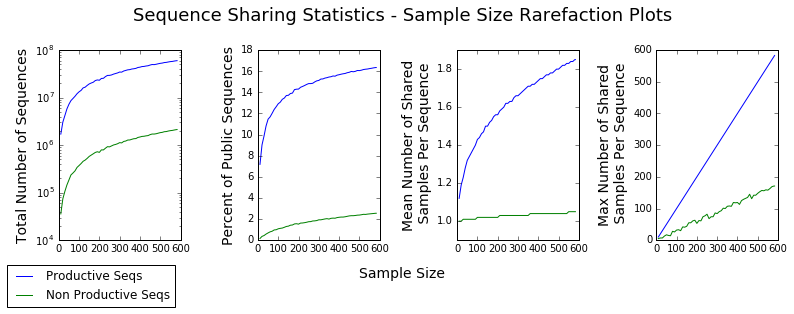

In [435]:
fig=plt.figure(figsize=(11,4))
plt.suptitle('Sequence Sharing Statistics - Sample Size Rarefaction Plots', fontsize=18)
plt.subplot(1,4,1)
plt.ylabel('Total Number of Sequences',fontsize=14)
plt.yscale('log')
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['total_n_seq_prod'],label='Productive Seqs')
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['total_n_seq_non_prod'],label='Non Productive Seqs')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.subplot(1,4,2)
plt.ylabel('Percent of Public Sequences',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['perc_public_prod'])
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['perc_public_non_prod'])
plt.subplot(1,4,3)
plt.ylabel('Mean Number of Shared\n Samples Per Sequence',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['mean_n_samples_prod'])
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['mean_n_samples_non_prod'])
plt.subplot(1,4,4)
plt.ylabel('Max Number of Shared\n Samples Per Sequence',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['max_n_samples_prod'])
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['max_n_samples_non_prod'])
fig.tight_layout()
fig.text(0.5, 0.04, 'Sample Size', ha='center',fontsize=14)

plt.subplots_adjust(top=0.83,bottom=0.17)
plt.show()

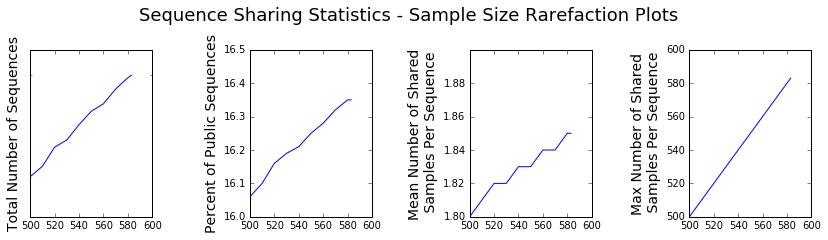

In [459]:
fig2=plt.figure(figsize=(14,4))
plt.suptitle('Sequence Sharing Statistics - Sample Size Rarefaction Plots', fontsize=18)
plt.subplot(1,4,1)
plt.ylabel('Total Number of Sequences',fontsize=14)
plt.yscale('log')
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['total_n_seq_prod'],label='Productive Seqs')
plt.xlim(500,600)
plt.ylim(50000000,62000000)
plt.subplot(1,4,2)
plt.ylabel('Percent of Public Sequences',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['perc_public_prod'])
plt.xlim(500,600)
plt.ylim(16,16.5)
plt.subplot(1,4,3)
plt.ylabel('Mean Number of Shared\n Samples Per Sequence',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['mean_n_samples_prod'])
plt.xlim(500,600)
plt.ylim(1.8,1.9)
plt.subplot(1,4,4)
plt.ylabel('Max Number of Shared\n Samples Per Sequence',fontsize=14)
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['max_n_samples_prod'])
plt.xlim(500,600)
plt.ylim(500,600)


#fig.tight_layout()
fig.text(0.5, 0.04, 'Sample Size', ha='center',fontsize=14)

plt.subplots_adjust(top=0.83,bottom=0.25,wspace=0.8)
plt.show()

In [436]:
filename='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/Sample Size Rarefaction Plots'
fig.savefig(filename, bbox_inches='tight', dpi = 800)

In [ ]:
prod_aa_seq_all_df_sample_means=prod_aa_seq_all_df.groupby('')